# PROJETO ANÁLISE DOS JOGOS DO CRUZEIRO NO CAMPEONATO MINEIRO

Este projeto analisa os jogos do Cruzeiro no Campeonato Mineiro, abordando estatísticas e padrões de desempenho.

Os dados foram extraídos manualmente e incluem **valores nulos e inconsistências**, permitindo a prática de tratamento de dados.

## Importação dos Dados

In [18]:
import pandas as pd
import numpy as np

file_path = r'C:\Users\Luiz Gustavo\OneDrive\Desktop\Cruzeiro_MIneiro\jogos_cruzeiro_mineiro.xlsx'
df = pd.read_excel(file_path)
print(df.head())

         Data          Mandante   Visitante Placar Resultado  \
0  19/01/2025          Cruzeiro    Tombense    1-0   Vitória   
1  22/01/2025  Atlético Mineiro    Cruzeiro    1-0   Derrota   
2  25/01/2025          Cruzeiro    Betim FC    NaN    Empate   
3  30/01/2025         Itabirito    Cruzeiro    1-4   Vitória   
4  02/02/2025          Cruzeiro  Uberlândia    3-1   Vitória   

           Campeonato  
0  Campeonato Mineiro  
1  Campeonato Mineiro  
2  Campeonato Mineiro  
3  Campeonato Mineiro  
4  Campeonato Mineiro  


## TRATANDO OS DADOS

In [19]:
print(df.head())

# Informações gerais sobre o DataFrame
print(df.info())

# Estatísticas descritivas (para colunas numéricas e categóricas)
print(df.describe(include='all'))

         Data          Mandante   Visitante Placar Resultado  \
0  19/01/2025          Cruzeiro    Tombense    1-0   Vitória   
1  22/01/2025  Atlético Mineiro    Cruzeiro    1-0   Derrota   
2  25/01/2025          Cruzeiro    Betim FC    NaN    Empate   
3  30/01/2025         Itabirito    Cruzeiro    1-4   Vitória   
4  02/02/2025          Cruzeiro  Uberlândia    3-1   Vitória   

           Campeonato  
0  Campeonato Mineiro  
1  Campeonato Mineiro  
2  Campeonato Mineiro  
3  Campeonato Mineiro  
4  Campeonato Mineiro  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Data        10 non-null     object
 1   Mandante    10 non-null     object
 2   Visitante   9 non-null      object
 3   Placar      9 non-null      object
 4   Resultado   9 non-null      object
 5   Campeonato  10 non-null     object
dtypes: object(6)
memory usage: 612.0+ bytes
None


## IDENTIFICANDO E TRATANDO VALORES NULOS

In [20]:
# Identificando valores nulos
print(df.isnull().sum())

# Preenchendo valores nulos no campo "Placar" de forma segura
df['Placar'] = df['Placar'].fillna('0-0')

# Removendo linhas com valores nulos (em qualquer coluna)
df.dropna(inplace=True)

Data          0
Mandante      0
Visitante     1
Placar        1
Resultado     1
Campeonato    0
dtype: int64


## LIMPEZA E PADRONIZAÇÃO DOS DADOS

In [21]:
# Remover espaços em branco em colunas de texto (com segurança)
df['Mandante'] = df['Mandante'].str.strip()

# Padronizar textos (ex: tudo minúsculo ou maiúsculo)
df['Resultado'] = df['Resultado'].str.lower()

# Garantir que não há valores nulos e que o 'Placar' segue o formato correto (ex: "1-0")
df.dropna(subset=['Placar'], inplace=True)
df = df[df['Placar'].str.match(r'^\d+-\d+$')]

# Separar o placar em duas colunas (Gols do Mandante e Visitante)
df[['Gols_Mandante', 'Gols_Visitante']] = df['Placar'].str.split('-', expand=True).astype(int)

# Exibir o DataFrame limpo
print(df)

         Data          Mandante    Visitante Placar Resultado  \
0  19/01/2025          Cruzeiro     Tombense    1-0   vitória   
1  22/01/2025  Atlético Mineiro     Cruzeiro    1-0   derrota   
2  25/01/2025          Cruzeiro     Betim FC    0-0    empate   
3  30/01/2025         Itabirito     Cruzeiro    1-4   vitória   
4  02/02/2025          Cruzeiro   Uberlândia    3-1   vitória   
6  09/02/2025          Cruzeiro  Atlético-MG    0-2   derrota   
7  12/02/2025      Democrata GV     Cruzeiro    2-1   derrota   

           Campeonato  Gols_Mandante  Gols_Visitante  
0  Campeonato Mineiro              1               0  
1  Campeonato Mineiro              1               0  
2  Campeonato Mineiro              0               0  
3  Campeonato Mineiro              1               4  
4  Campeonato Mineiro              3               1  
6  Campeonato Mineiro              0               2  
7  Campeonato Mineiro              2               1  


## CRIANDO NOVAS COLUNAS 

In [22]:
# Criar uma coluna indicando se o Cruzeiro foi mandante
df['Cruzeiro_Mandante'] = df['Mandante'].str.contains('Cruzeiro')

# Classificar o resultado em pontos
df['Pontos'] = df['Resultado'].map({'vitória': 3, 'empate': 1, 'derrota': 0})

print(df)

         Data          Mandante    Visitante Placar Resultado  \
0  19/01/2025          Cruzeiro     Tombense    1-0   vitória   
1  22/01/2025  Atlético Mineiro     Cruzeiro    1-0   derrota   
2  25/01/2025          Cruzeiro     Betim FC    0-0    empate   
3  30/01/2025         Itabirito     Cruzeiro    1-4   vitória   
4  02/02/2025          Cruzeiro   Uberlândia    3-1   vitória   
6  09/02/2025          Cruzeiro  Atlético-MG    0-2   derrota   
7  12/02/2025      Democrata GV     Cruzeiro    2-1   derrota   

           Campeonato  Gols_Mandante  Gols_Visitante  Cruzeiro_Mandante  \
0  Campeonato Mineiro              1               0               True   
1  Campeonato Mineiro              1               0              False   
2  Campeonato Mineiro              0               0               True   
3  Campeonato Mineiro              1               4              False   
4  Campeonato Mineiro              3               1               True   
6  Campeonato Mineiro        

## ANALISE ESTATISTICA

In [23]:
# Total de pontos do Cruzeiro
total_pontos = df['Pontos'].sum()
print(f'Total de pontos do Cruzeiro: {total_pontos}')

# Média de gols do Cruzeiro
media_gols = df[df['Mandante'] == 'Cruzeiro']['Gols_Mandante'].mean()
print(f'Média de gols em casa: {media_gols:.2f}')

# Contagem de vitórias, derrotas e empates
print(df['Resultado'].value_counts())

Total de pontos do Cruzeiro: 10
Média de gols em casa: 1.00
Resultado
vitória    3
derrota    3
empate     1
Name: count, dtype: int64


## VIZUALIZAÇÕES

C:\Users\Luiz Gustavo\AppData\Local\Temp\ipykernel_7532\3426549763.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Resultado', data=df, palette='crest')


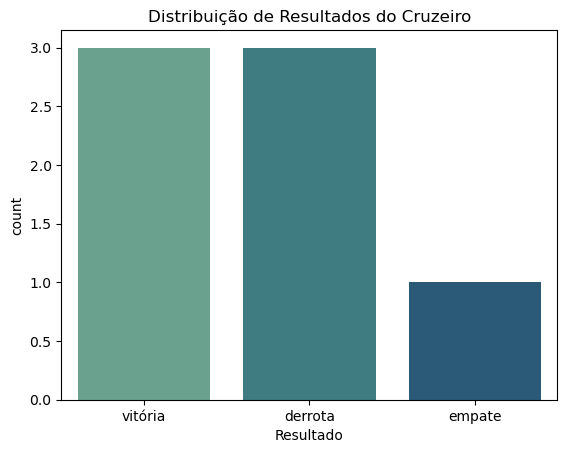

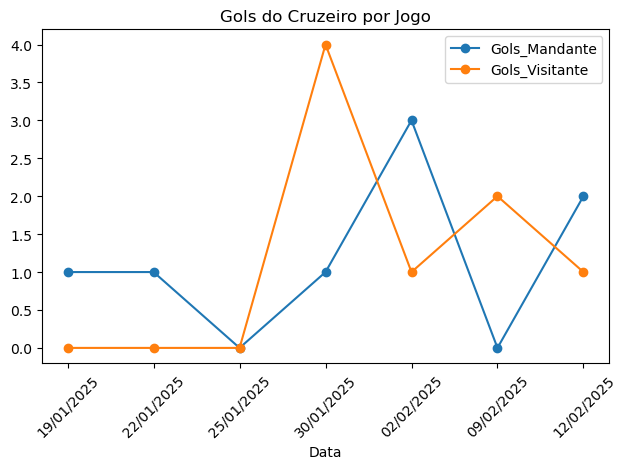

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribuição de Resultados
sns.countplot(x='Resultado', data=df, palette='crest')
plt.title('Distribuição de Resultados do Cruzeiro')
plt.show()

# Gols por Jogo
df.plot(x='Data', y=['Gols_Mandante', 'Gols_Visitante'], kind='line', marker='o')
plt.title('Gols do Cruzeiro por Jogo')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X
plt.tight_layout()  # Ajusta automaticamente para evitar sobreposição
plt.show()

## EXPORTANDO DADOS TRATADOS

In [26]:
# Salvar o DataFrame tratado em um novo arquivo
df.to_excel('jogos_cruzeiro_tratado.xlsx', index=False)